**Predictive modelinig Project**
--
**Context**

An over-the-top (OTT) media service is a media service offered directly to viewers via the internet. The term is most synonymous with subscription-based video-on-demand services that offer access to film and television content, including existing series acquired from other producers, as well as original content produced specifically for the service. They are typically accessed via websites on personal computers, apps on smartphones and tablets, or televisions with integrated Smart TV platforms.

Presently, OTT services are at a relatively nascent stage and are widely accepted as a trending technology across the globe. With the increasing change in customers' social behavior, which is shifting from traditional subscriptions to broadcasting services and OTT on-demand video and music subscriptions every year, OTT streaming is expected to grow at a very fast pace. The global OTT market size was valued at `$`121.61 billion in 2019 and is projected to reach `$` 1,039.03 billion by 2027, growing at a CAGR of 29.4% from 2020 to 2027. The shift from television to OTT services for entertainment is driven by benefits such as on-demand services, ease of access, and access to better networks and digital connectivity.

With the outbreak of COVID19, OTT services are striving to meet the growing entertainment appetite of viewers, with some platforms already experiencing a 46% increase in consumption and subscriber count as viewers seek fresh content. With innovations and advanced transformations, which will enable the customers to access everything they want in a single space, OTT platforms across the world are expected to increasingly attract subscribers on a concurrent basis.



**Objective**

ShowTime is an OTT service provider and offers a wide variety of content (movies, web shows, etc.) for its users. They want to determine the driver variables for first-day content viewership so that they can take necessary measures to improve the viewership of the content on their platform. Some of the reasons for the decline in viewership of content would be the decline in the number of people coming to the platform, decreased marketing spend, content timing clashes, weekends and holidays, etc. They have hired you as a Data Scientist, shared the data of the current content in their platform, and asked you to analyze the data and come up with a linear regression model to determine the driving factors for *`first-day viewership`*.



**Data Description**
The data contains the different factors to analyze for the content. The detailed data dictionary is given below.

**Data Dictionary**:

visitors: Average number of visitors, in millions, to the platform in the past week

ad_impressions: Number of ad impressions, in millions, across all ad campaigns for the content (running and completed)

major_sports_event: Any major sports event on the day

genre: Genre of the content

dayofweek: Day of the release of the content

season: Season of the release of the content

views_trailer: Number of views, in millions, of the content trailer

views_content: Number of first-day views, in millions, of the content


In [ ]:
# Libraries to help with reading and manipulating data
import numpy as np
import pandas as pd
import matplotlib

# Libraries to help with data visualization
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

# split the data into train and test
from sklearn.model_selection import train_test_split

# to build linear regression_model
import statsmodels.api as sm

# to check model performance
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive/') #/Colab_notebooks/Python_Files
df = pd.read_csv('/content/drive/MyDrive/project/Linear Regression/ottdata.csv')

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).


In [ ]:
# let's check the shape of the data
df.shape

(1000, 8)

- This data contains 1000 records with 8 columns.

In [ ]:
# let's check the first 5 rows of the data
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,0,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,1,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,1,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,1,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,0,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
# let's check column types and number of values
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   int64  
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), int64(1), object(3)
memory usage: 62.6+ KB


- There are 5 numeric (float and int type) and 3 string (object type) columns in the data.
- The target variable is the views_content (first day views), which is a float type.

In [ ]:
df.describe(include="all").T

,count,unique,top,freq,mean,std,min,25%,50%,75%,max
visitors,1000.0,NaN,NaN,NaN,1.70429,0.231973,1.25,1.55,1.7,1.83,2.34
ad_impressions,1000.0,NaN,NaN,NaN,1434.71229,289.534834,1010.87,1210.33,1383.58,1623.67,2424.2
major_sports_event,1000.0,NaN,NaN,NaN,0.4,0.490143,0.0,0.0,0.0,1.0,1.0
genre,1000,8,Others,255,NaN,NaN,NaN,NaN,NaN,NaN,NaN
dayofweek,1000,7,Friday,369,NaN,NaN,NaN,NaN,NaN,NaN,NaN
season,1000,4,Winter,257,NaN,NaN,NaN,NaN,NaN,NaN,NaN
views_trailer,1000.0,NaN,NaN,NaN,66.91559,35.00108,30.08,50.9475,53.96,57.755,199.92
views_content,1000.0,NaN,NaN,NaN,0.4734,0.105914,0.22,0.4,0.45,0.52,0.89


Unique Genres:
"There are 8 unique genres in the dataset."

Seasons Observed:
"A total of 4 seasons have been observed."

Outliers in Views Trailer & Ad Impressions:
"It appears that views of trailers and ad impressions contain outliers."

Mean and Standard Deviation of Views Content:
"The mean of views content is 0.47 with a standard deviation of 0.1."

Comparison of Mean and Median for Views Content:
"The mean of views content is almost similar to the median or shows a very low difference."



**Checking duplicate values**

In [ ]:
df.duplicated().sum()

0

- There are no duplicates.

**Checking missing values**

In [ ]:
df.isnull().sum()

visitors              0
ad_impressions        0
major_sports_event    0
genre                 0
dayofweek             0
season                0
views_trailer         0
views_content         0
dtype: int64

- There are no missing values in all the columns

##Exploratory Data Analysis (EDA)

###Univariate Analysis

In [ ]:
def histogram_boxplot(data, feature, figsize=(15, 10), kde=True, bins=None):
    """
    Boxplot and histogram combined

    data: dataframe
    feature: dataframe column
    figsize: size of figure (default (15,10))
    kde: whether to show the density curve (default False)
    bins: number of bins for histogram (default None)
    """
    f2, (ax_box2, ax_hist2) = plt.subplots(
        nrows=2,  # Number of rows of the subplot grid= 2
        sharex=True,  # x-axis will be shared among all subplots
        gridspec_kw={"height_ratios": (0.25, 0.75)},
        figsize=figsize,
    )  # creating the 2 subplots
    sns.boxplot(
        data=data, x=feature, ax=ax_box2, showmeans=True, color="violet"
    )  # boxplot will be created and a triangle will indicate the mean value of the column
    sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2, bins=bins
    ) if bins else sns.histplot(
        data=data, x=feature, kde=kde, ax=ax_hist2
    )  # For histogram
    ax_hist2.axvline(
        data[feature].mean(), color="green", linestyle="--"
    )  # Add mean to the histogram
    ax_hist2.axvline(
        data[feature].median(), color="black", linestyle="-"
    )  # Add median to the histogram

In [ ]:
# function to create labeled barplots


def labeled_barplot(data, feature, perc=False, n=None):
    """
    Barplot with percentage at the top

    data: dataframe
    feature: dataframe column
    perc: whether to display percentages instead of count (default is False)
    n: displays the top n category levels (default is None, i.e., display all levels)
    """

    total = len(data[feature])  # length of the column
    count = data[feature].nunique()
    if n is None:
        plt.figure(figsize=(count + 2, 6))
    else:
        plt.figure(figsize=(n + 2, 6))

    plt.xticks(rotation=45, fontsize=15)
    ax = sns.countplot(
        data=data,
        x=feature,
        hue=feature,
        palette="Paired",
        order=data[feature].value_counts().index[:n],
    )

    for p in ax.patches:
        if perc == True:
            label = "{:.1f}%".format(
                100 * p.get_height() / total
            )  # percentage of each class of the category
        else:
            label = p.get_height()  # count of each level of the category

        x = p.get_x() + p.get_width() / 2  # width of the plot
        y = p.get_height()  # height of the plot

        ax.annotate(
            label,
            (x, y),
            ha="center",
            va="center",
            size=12,
            xytext=(0, 5),
            textcoords="offset points",
        )  # annotate the percentage

    plt.show()  # show the plot

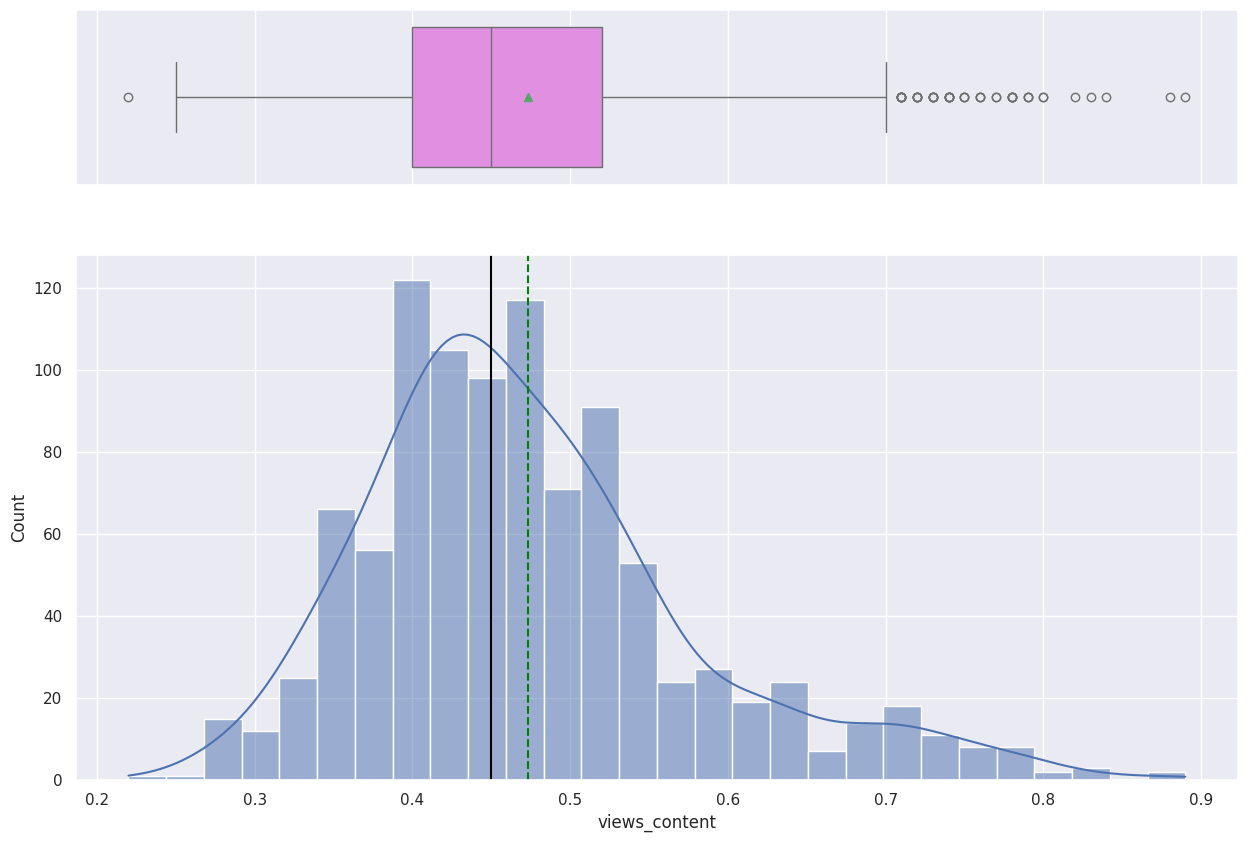

In [ ]:
# views content histplot
histogram_boxplot(df, "views_content")

- Few outliers can be observed in the views content field and distribution is right skewed.
- Avg less than 0.5 million watched the actual content.

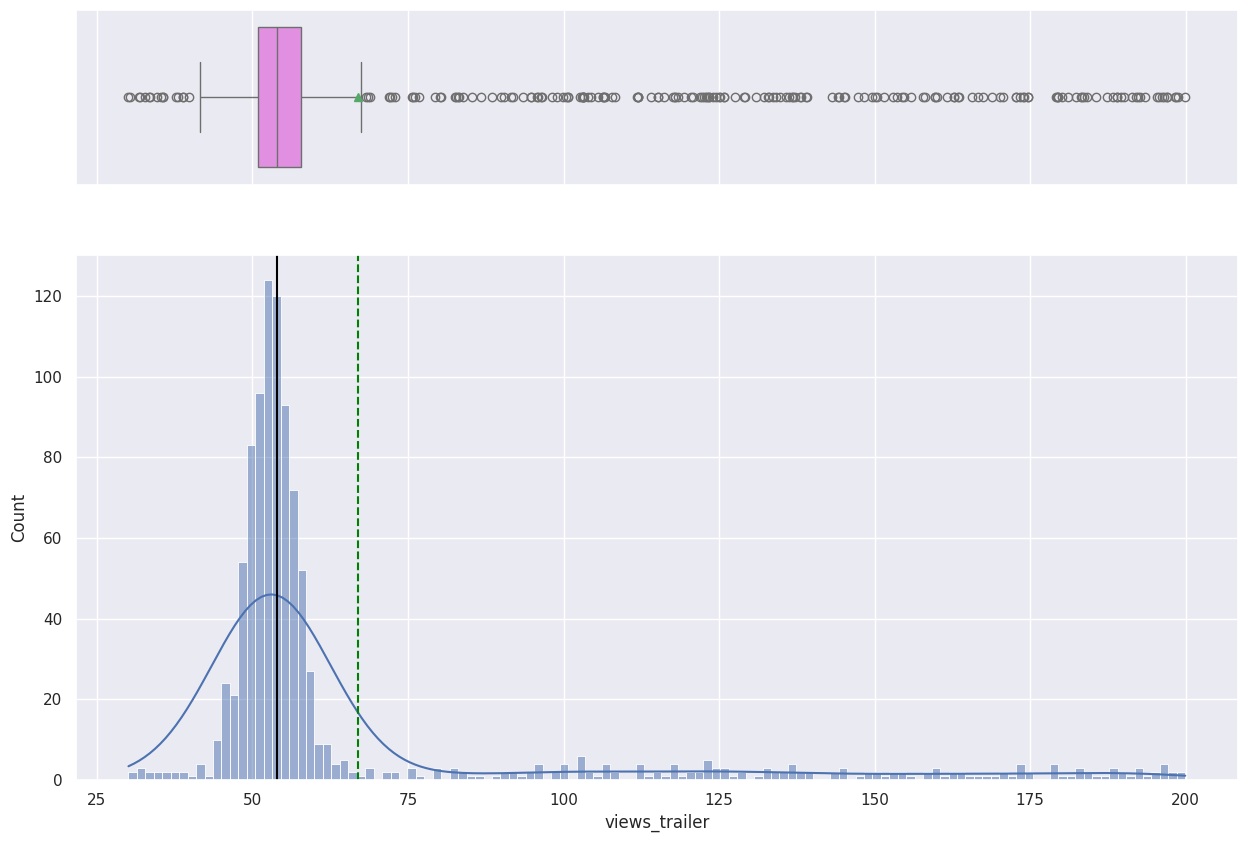

In [ ]:
# trailer views histplot
histogram_boxplot(df, "views_trailer")

- Heavily right-skewed data.
- Too many outliers can be observed at both the tails.
- Mean less than 70 million viewed the trailer.

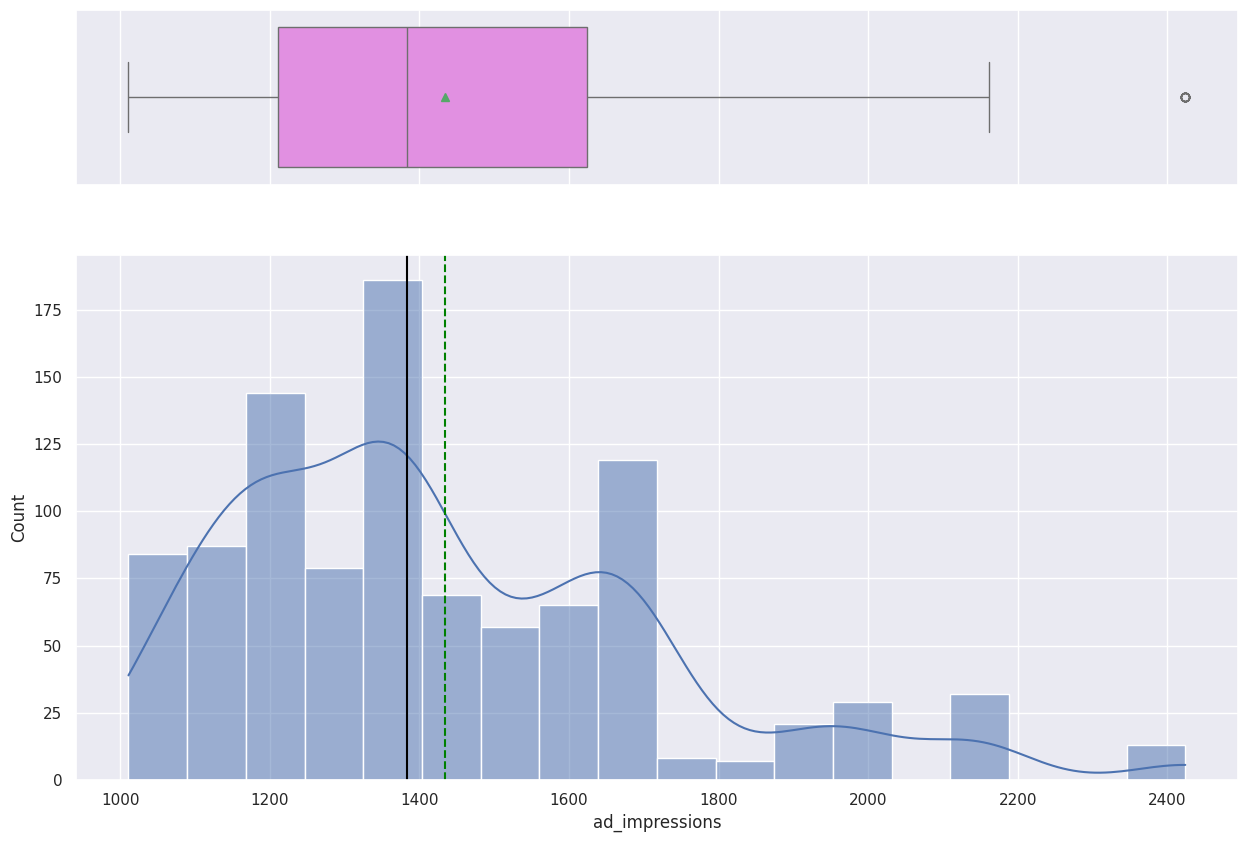

In [ ]:
# Age histplot
histogram_boxplot(df, "ad_impressions")

- one outlier can be observed in the ad impression.
- It's not following a normal distribution.
- Mean ad impression is less than 1400.

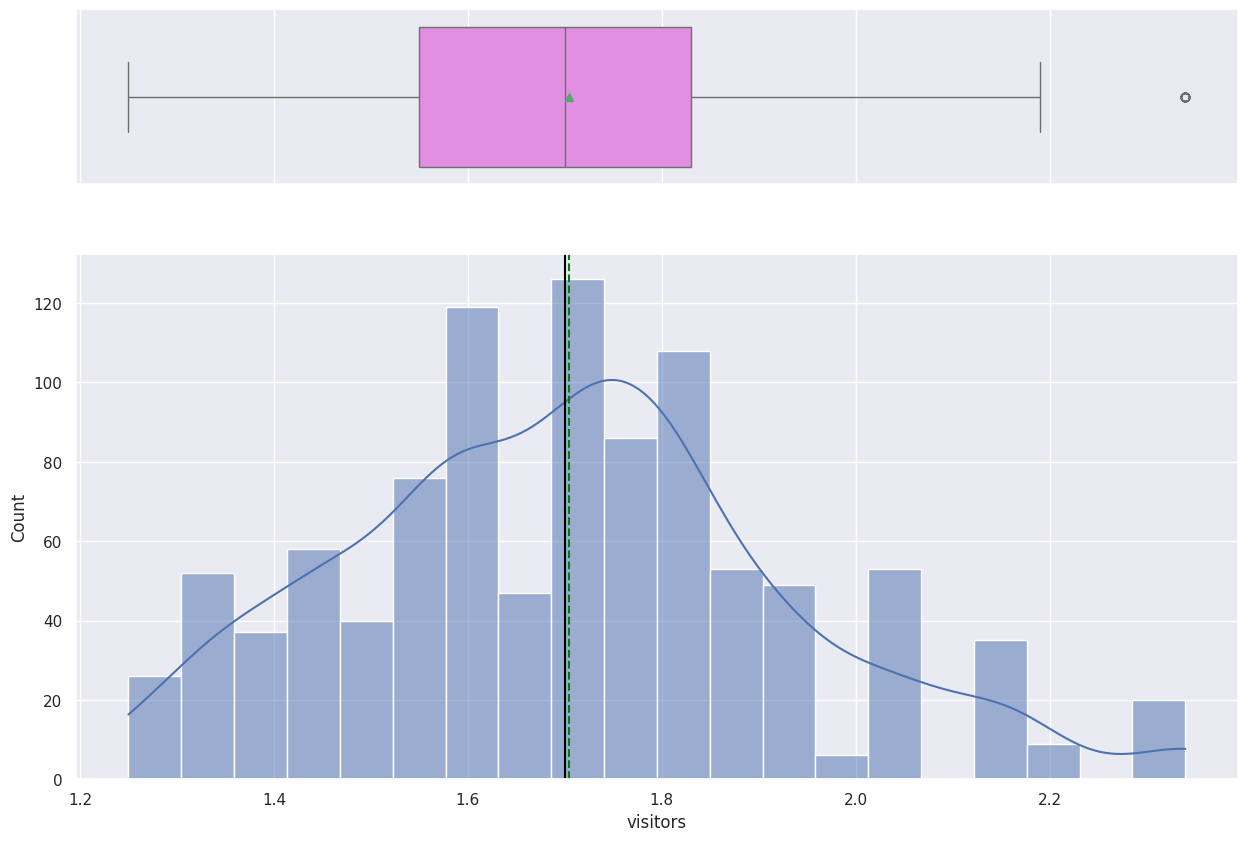

In [ ]:
# Visitors histplot
histogram_boxplot(df, "visitors")

- Almost a normal distribution with only single outlier can be observed.
- Mean and median follows almost similar at 1.7 million visitors for previous week.

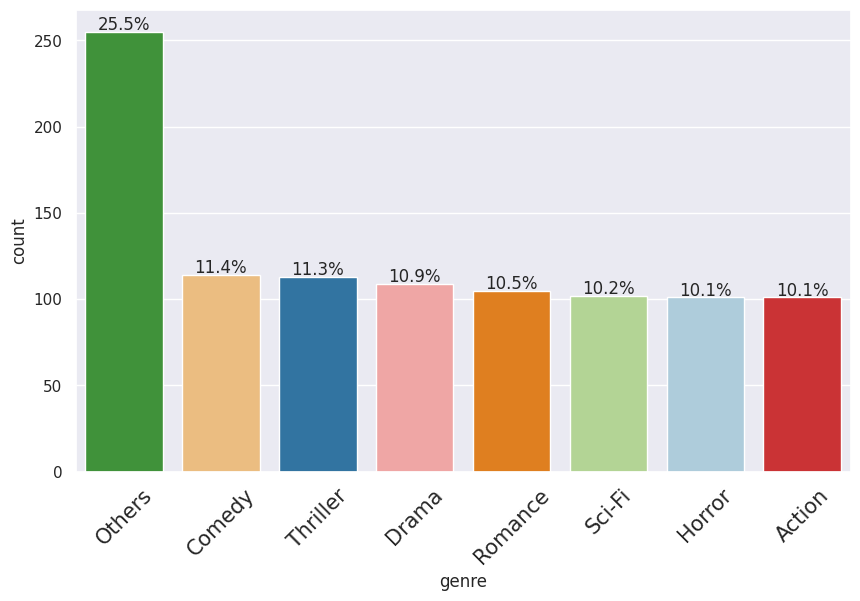

In [ ]:
labeled_barplot(df, "genre", perc=True)

- Genre others is almost one fourth of total genre.

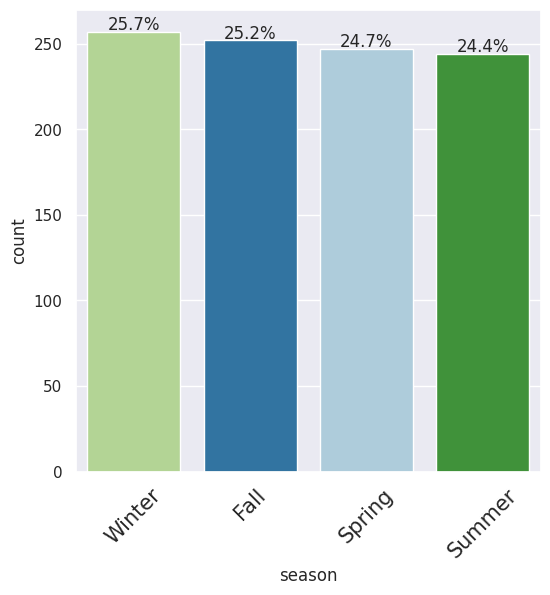

In [ ]:
labeled_barplot(df, "season", perc=True)


- There are four season almost all of them contains one fourth of the data.

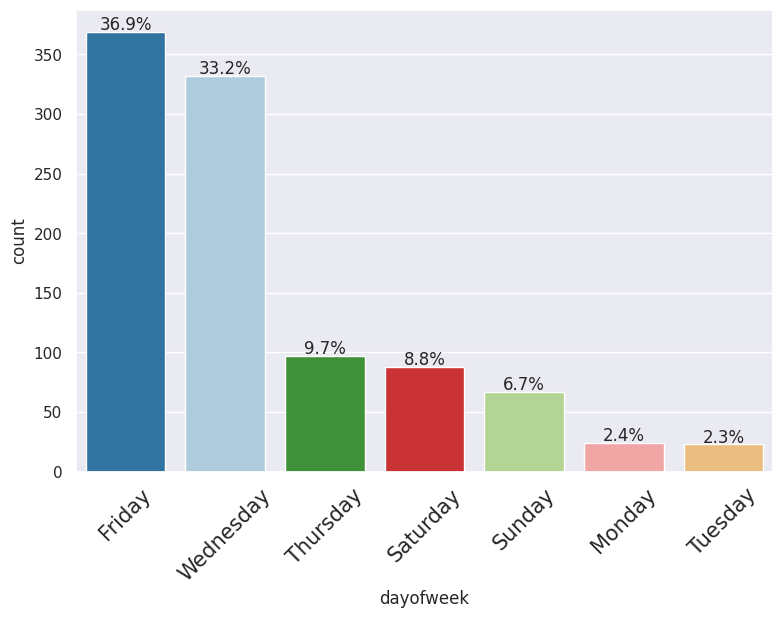

In [ ]:
labeled_barplot(df, "dayofweek", perc=True);

-	Most of the content seems to be released on Friday followed by Wednesday.
-	Very few contents get released on Wednesday.


### Bivariate Analysis

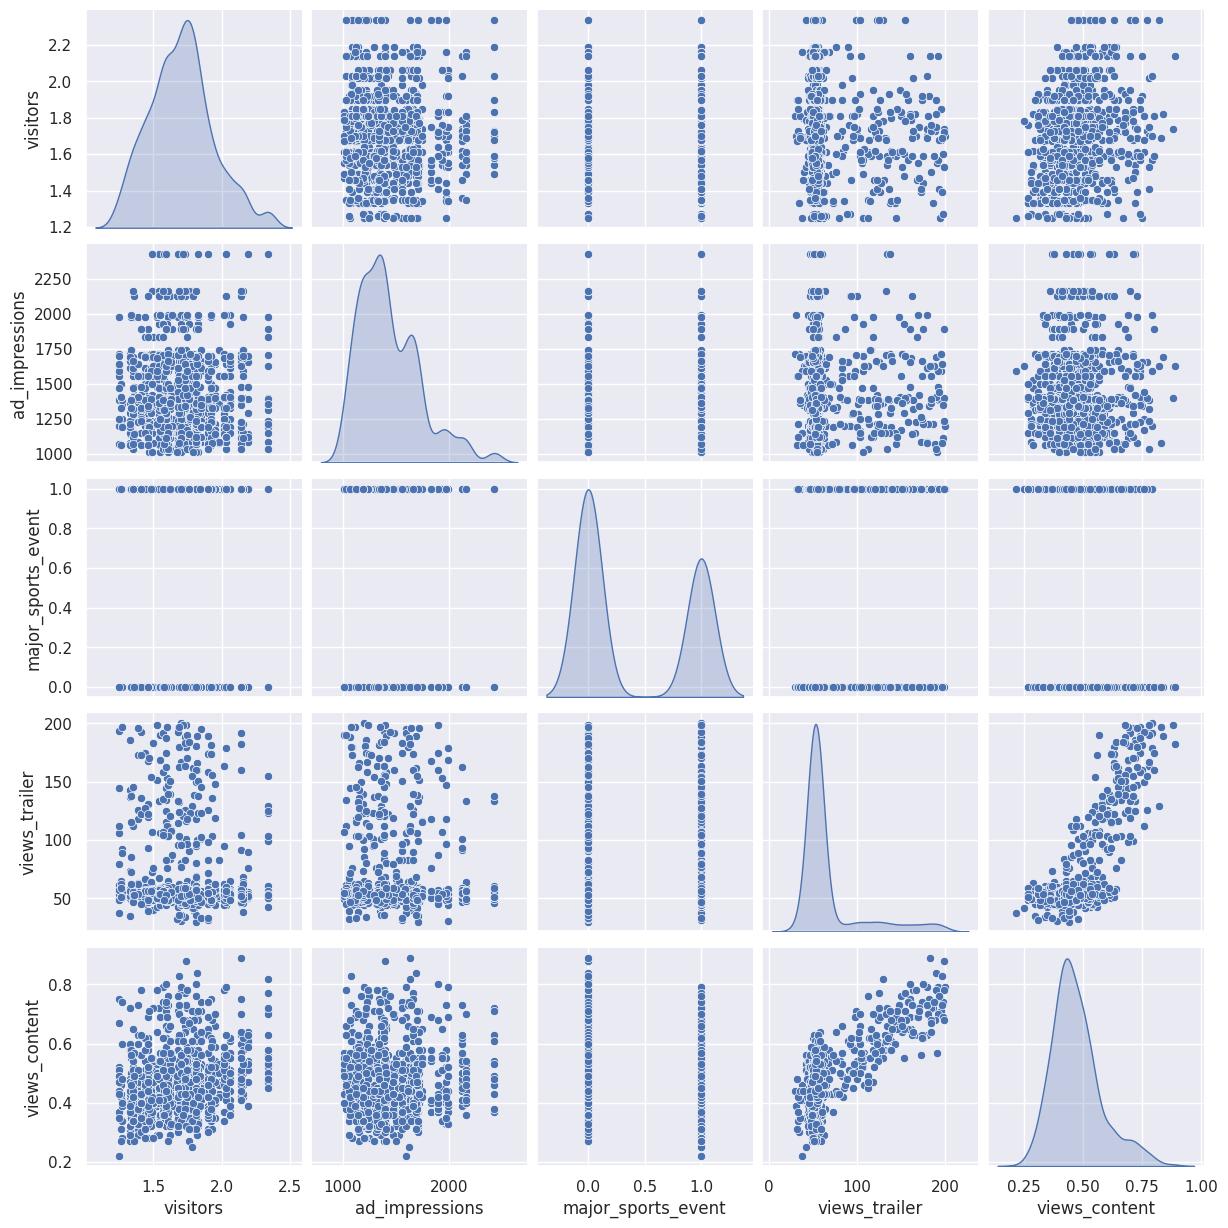

In [ ]:
sns.pairplot(
    df, diag_kind="kde"
)  # to plot density curve instead of histogram on the diag

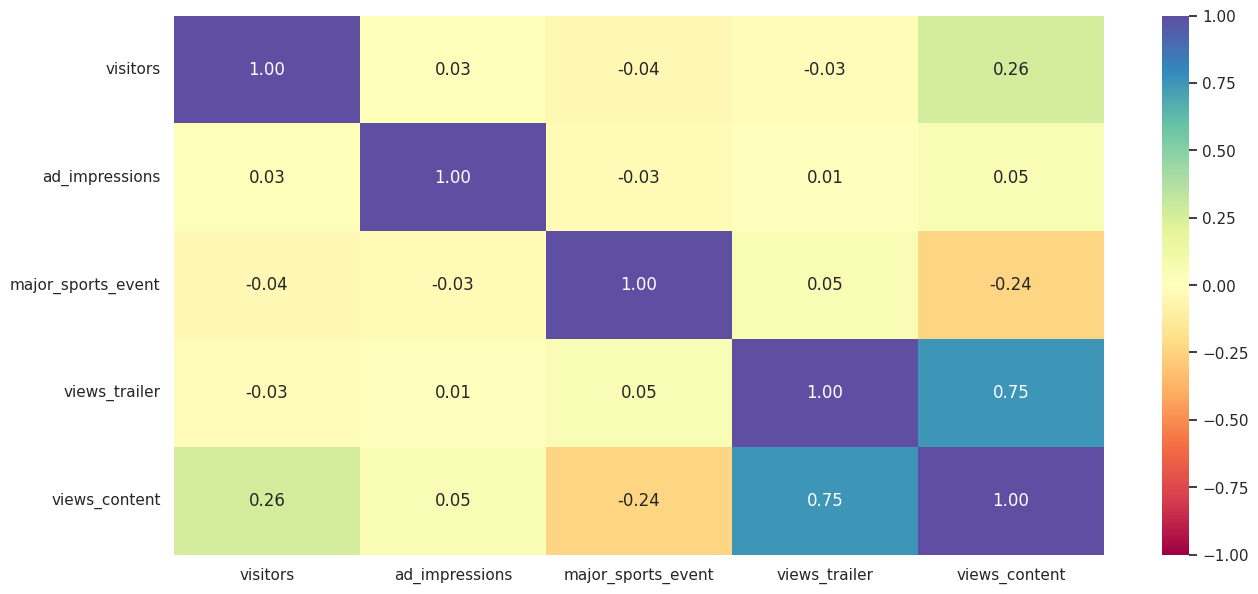

In [ ]:
numeric_df = df.select_dtypes(include=['float64', 'int64'])
plt.figure(figsize=(15, 7))
sns.heatmap(numeric_df.corr(), annot=True, vmin=-1, vmax=1, fmt=".2f", cmap="Spectral")
plt.show()

-	Positive correlation can be observed between Views content and viws trailer.
-	A little negative correlation can be observed between major sprots event and content views.


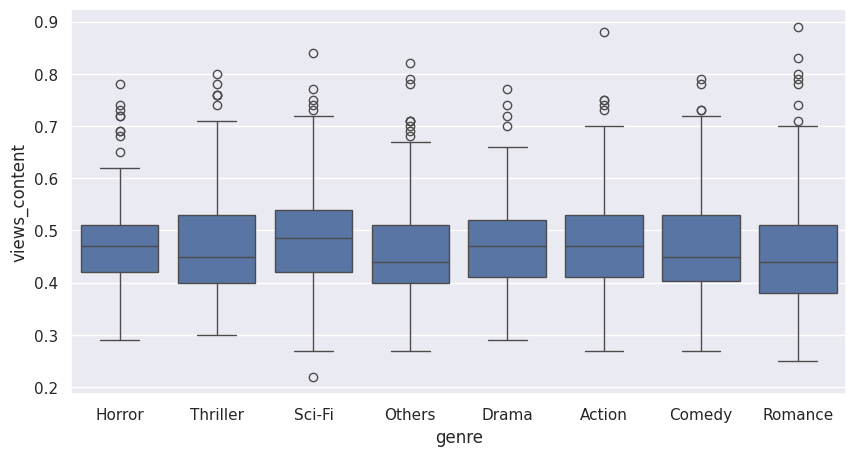

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_content")
plt.show()

- With respect to different genre mean observed views of content looks in between 0.43 to 0.5 million.
- However, there seems to be presence of outliers for all the genre types.

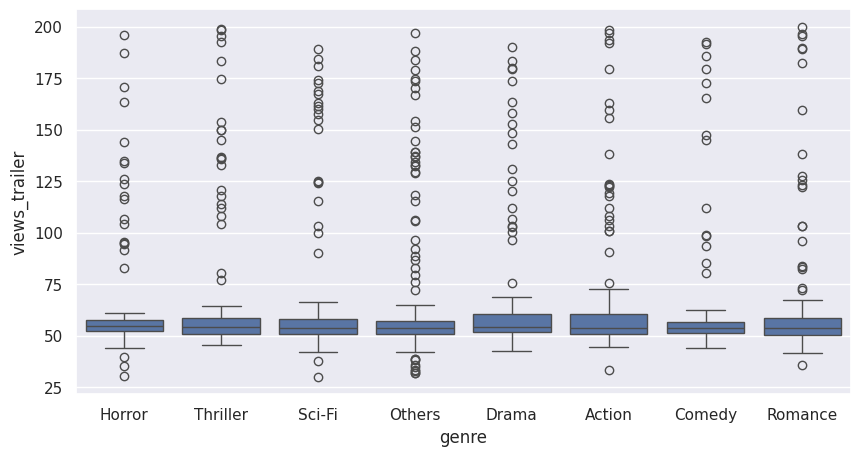

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_trailer")
plt.show()

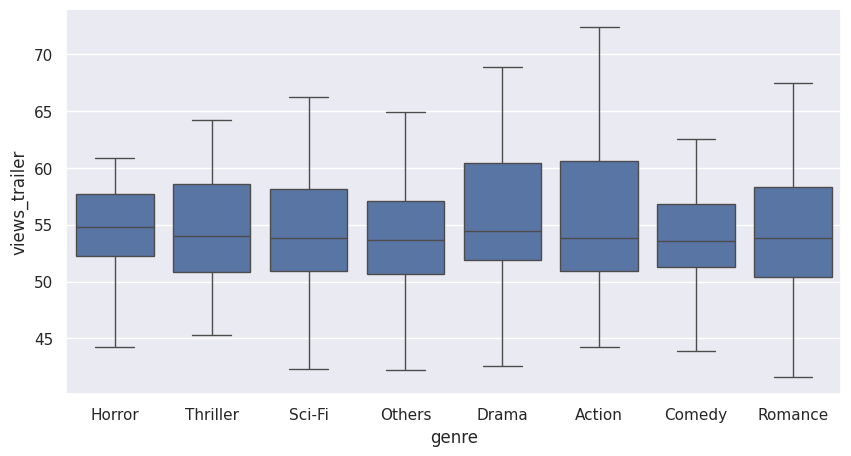

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="views_trailer",showfliers = False)
plt.show()

- Outliers can be observed at the right.
- Seems to have almost mean of 53 - 55 million views in trailer for all the genre.

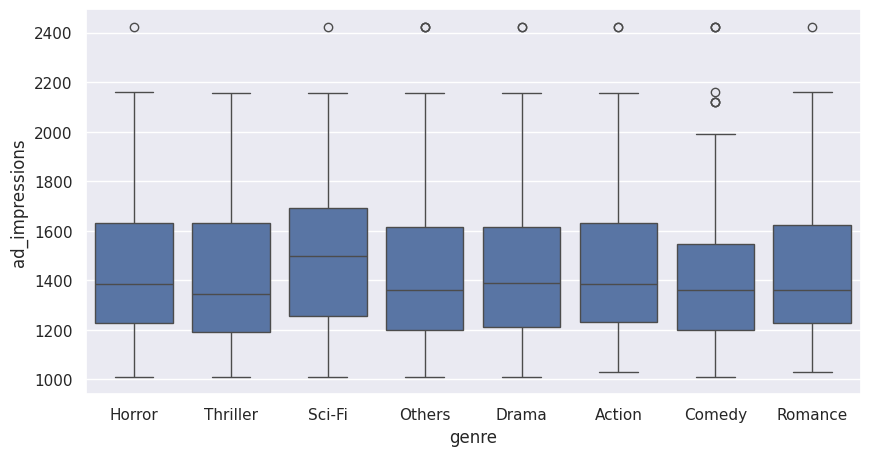

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="genre", y="ad_impressions")
plt.show()

- Mean ad impression is little bit high for the Sci-Fi than other genre.

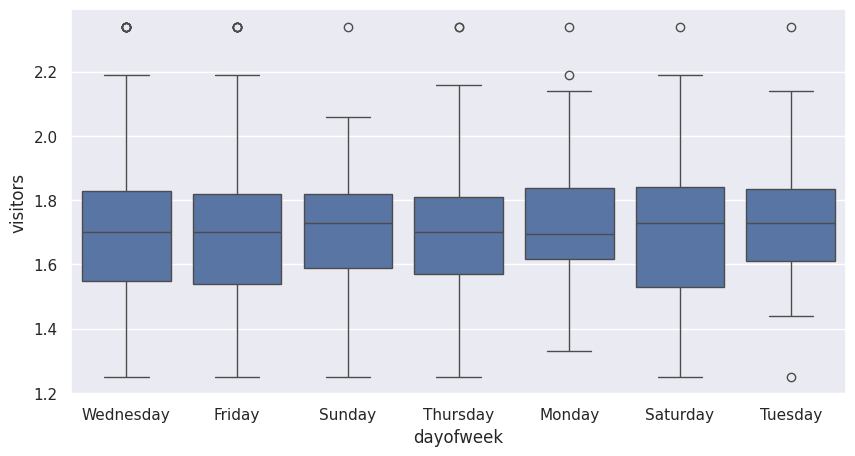

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="visitors")
plt.show()

- In all the days of release average visitors seems to be in between 1.675 to 1.730 millions.
- Outliers can be observed.

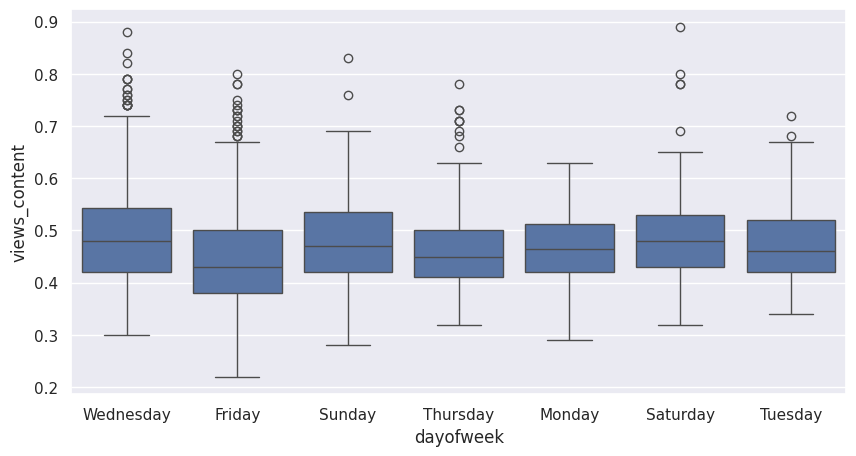

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="views_content")
plt.show()

- The mean content views decreases for Friday content release with respect to other days.
- Slightly more content views can be observed on wednesday.
- There are outliers present for all the days of content release at right tail (positive skewed).

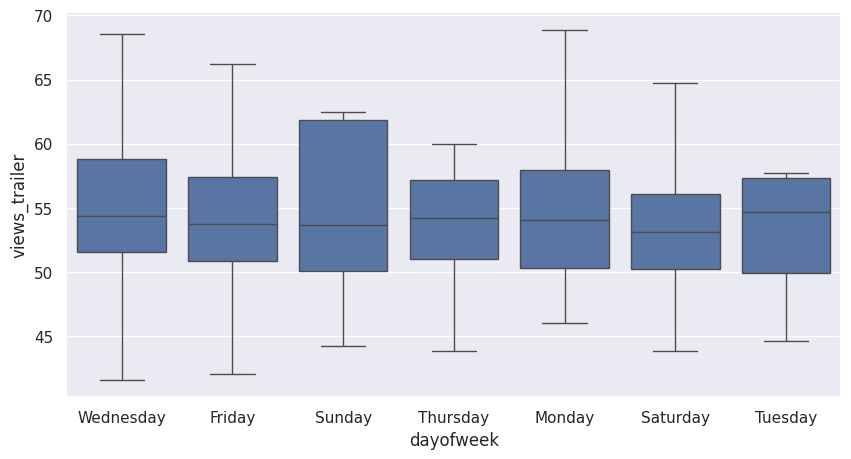

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="dayofweek", y="views_trailer",showfliers = False)
plt.show()

- The mean trailer views is almost similar (53 to 55 millions) for all the day of the release of the content.
- However, for Sunday tird quartile shows higher than others, nearly around at 62 - 63 milions.
- In all the days of content release outliers can be observed.

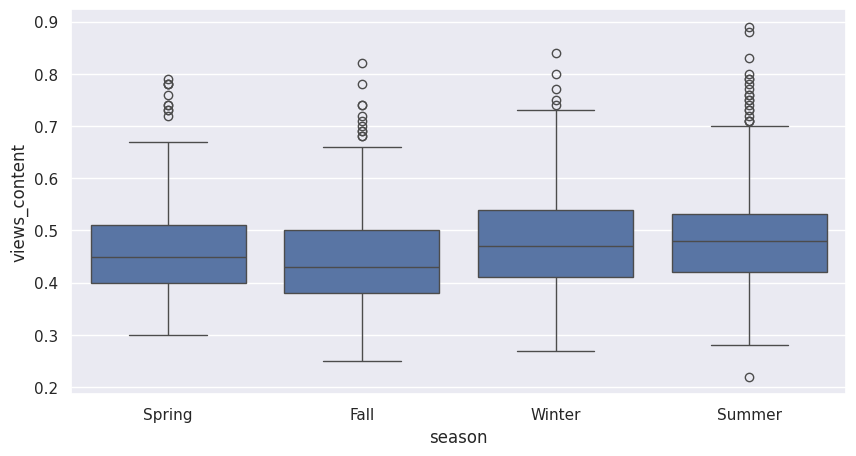

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="views_content")
plt.show()

- In the winter and summer the mean content views increases than the fall and spring season.
- Average content views for all the seasons looks in between 0.43 to 0.5 millions.
- There are outliers present for all the season at the right tail.

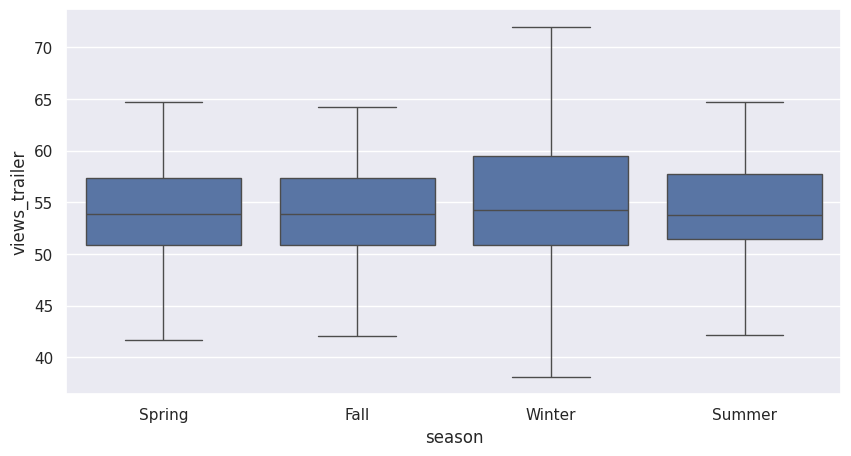

In [ ]:
plt.figure(figsize=(10, 5))
sns.boxplot(data=df, x="season", y="views_trailer", showfliers = False)
plt.show()

- The mean triler views are almost at same number for all the season release of content.
- However, for winter the third quartile is higher than all the season realease.

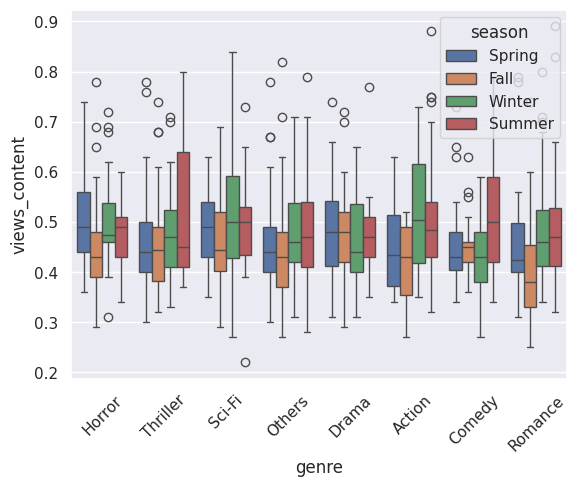

In [ ]:
sns.boxplot(data=df, x='genre',y='views_content',hue='season')
plt.xticks(rotation=45);

**Let's check how major sports event can contribute to the content views.**

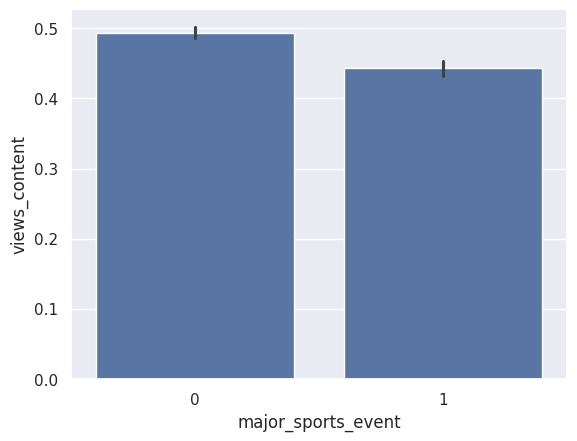

In [ ]:
sns.barplot(data=df, x='major_sports_event',y='views_content');

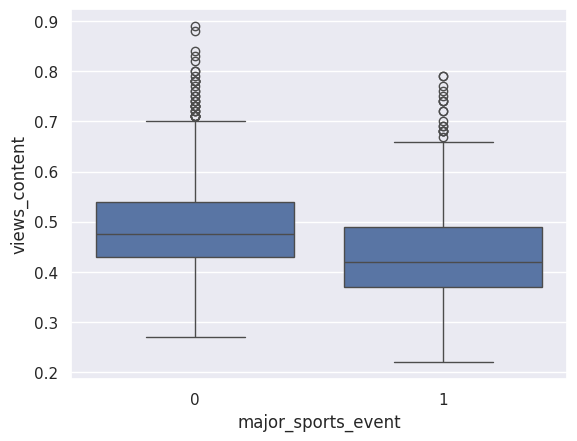

In [ ]:
sns.boxplot(data=df, x='major_sports_event',y='views_content');

In [ ]:
df.groupby('major_sports_event')['views_content'].mean()

major_sports_event
0    0.4938
1    0.4428
Name: views_content, dtype: float64

- A significant decrease in average content viewership can be observed due to sports events, with 0.49 million views on non-sports event days compared to 0.44 million views on sports event days.

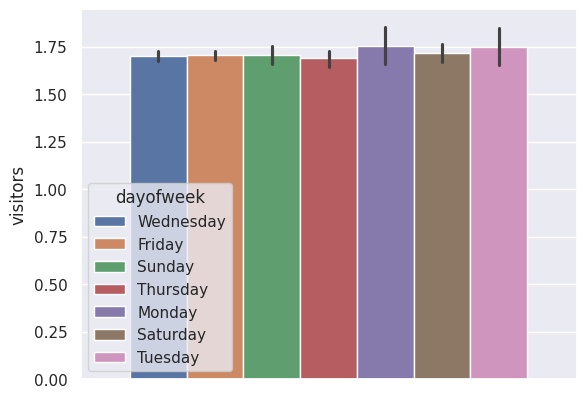

In [ ]:
sns.barplot(data=df, hue='dayofweek', y='visitors');

- The number of visitors is almost same for all the days of content release.

**Let's check how trailer views can contribute to the content views.**

<Figure size 3000x1000 with 0 Axes>

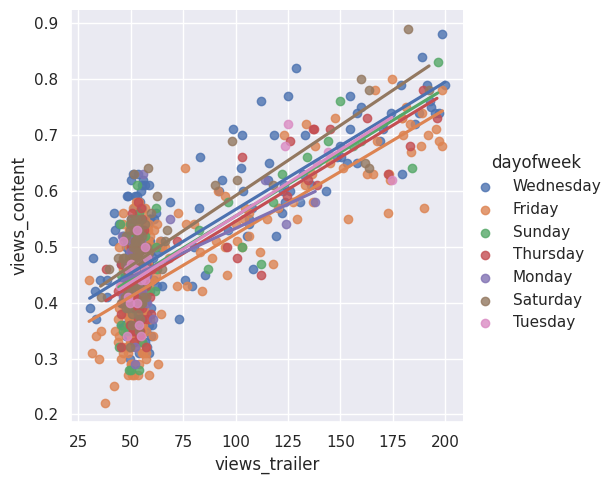

In [ ]:
plt.figure(figsize = (30,10))
sns.lmplot(data=df, x='views_trailer',y='views_content',hue='dayofweek',ci=False);

- Content viewership is positively correlated with trailer viewership. On Saturdays, there is a higher number of content viewers compared to other weekdays. Interestingly, Sundays show relatively low viewers, which could be further analyzed by examining the data for different hours of the day.

##Data preprocessing
**For the column `major_sports_event`, replace the 1 values with '*yes*' and 0 values with '*no*'.**

In [ ]:
df["major_sports_event"] = df["major_sports_event"].replace({1: "yes", 0: "no"})
df.head()

,visitors,ad_impressions,major_sports_event,genre,dayofweek,season,views_trailer,views_content
0,1.67,1113.81,no,Horror,Wednesday,Spring,56.70,0.51
1,1.46,1498.41,yes,Thriller,Friday,Fall,52.69,0.32
2,1.47,1079.19,yes,Thriller,Wednesday,Fall,48.74,0.39
3,1.85,1342.77,yes,Sci-Fi,Friday,Fall,49.81,0.44
4,1.46,1498.41,no,Sci-Fi,Sunday,Winter,55.83,0.46


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 8 columns):
 #   Column              Non-Null Count  Dtype  
---  ------              --------------  -----  
 0   visitors            1000 non-null   float64
 1   ad_impressions      1000 non-null   float64
 2   major_sports_event  1000 non-null   object 
 3   genre               1000 non-null   object 
 4   dayofweek           1000 non-null   object 
 5   season              1000 non-null   object 
 6   views_trailer       1000 non-null   float64
 7   views_content       1000 non-null   float64
dtypes: float64(4), object(4)
memory usage: 62.6+ KB


##Create Dummy Variables

In [ ]:
# drop_first=True will drop one of the extra columns
df = pd.get_dummies(df, columns=df.select_dtypes(include=["object", "category"]).columns.tolist(), drop_first=True)
df.head()

,visitors,ad_impressions,views_trailer,views_content,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.51,False,False,False,True,False,False,...,False,False,False,False,False,False,True,True,False,False
1,1.46,1498.41,52.69,0.32,True,False,False,False,False,False,...,True,False,False,False,False,False,False,False,False,False
2,1.47,1079.19,48.74,0.39,True,False,False,False,False,False,...,True,False,False,False,False,False,True,False,False,False
3,1.85,1342.77,49.81,0.44,True,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,1.46,1498.41,55.83,0.46,False,False,False,False,False,False,...,False,False,False,True,False,False,False,False,False,True


##Split Data

In [ ]:
# defining X and y variables
X = df.drop(["views_content"], axis=1)
y = df["views_content"]

print(X.head())
print(y.head())

   visitors  ad_impressions  views_trailer  major_sports_event_yes  \
0      1.67         1113.81          56.70                   False   
1      1.46         1498.41          52.69                    True   
2      1.47         1079.19          48.74                    True   
3      1.85         1342.77          49.81                    True   
4      1.46         1498.41          55.83                   False   

   genre_Comedy  genre_Drama  genre_Horror  genre_Others  genre_Romance  \
0         False        False          True         False          False   
1         False        False         False         False          False   
2         False        False         False         False          False   
3         False        False         False         False          False   
4         False        False         False         False          False   

   genre_Sci-Fi  genre_Thriller  dayofweek_Monday  dayofweek_Saturday  \
0         False           False             False      

In [ ]:
# converting the input attributes into float type for modeling
X = X.astype(float)
X.head()

,visitors,ad_impressions,views_trailer,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,genre_Sci-Fi,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
0,1.67,1113.81,56.70,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
1,1.46,1498.41,52.69,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.47,1079.19,48.74,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
3,1.85,1342.77,49.81,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.46,1498.41,55.83,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0


In [ ]:
# let's add the intercept to data
X = sm.add_constant(X)

In [ ]:
# splitting the data in 70:30 ratio for train to test data

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=1)

In [ ]:
print("Number of rows in train data =", x_train.shape[0])
print("Number of rows in test data =", x_test.shape[0])

Number of rows in train data = 700
Number of rows in test data = 300


##Model Building - Linear Regression

In [ ]:
x_train

,const,visitors,ad_impressions,views_trailer,major_sports_event_yes,genre_Comedy,genre_Drama,genre_Horror,genre_Others,genre_Romance,...,genre_Thriller,dayofweek_Monday,dayofweek_Saturday,dayofweek_Sunday,dayofweek_Thursday,dayofweek_Tuesday,dayofweek_Wednesday,season_Spring,season_Summer,season_Winter
731,1.0,1.64,1992.53,49.62,0.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
716,1.0,1.69,2158.03,132.93,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
640,1.0,1.47,1229.35,54.13,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
804,1.0,1.49,1010.87,106.62,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
737,1.0,2.19,1119.90,52.04,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
767,1.0,1.57,1323.74,55.61,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,0.0,0.0
72,1.0,1.77,1700.04,54.98,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,1.0
908,1.0,1.54,1398.05,53.75,1.0,0.0,1.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
235,1.0,2.02,1284.86,94.84,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [ ]:
olsmodel = sm.OLS(y_train, x_train).fit()
print(olsmodel.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.792
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     129.0
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.32e-215
Time:                        16:54:20   Log-Likelihood:                 1124.6
No. Observations:                 700   AIC:                            -2207.
Df Residuals:                     679   BIC:                            -2112.
Df Model:                          20                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

##Interpretation of Regression results

1. **Adjusted. R-squared**: It reflects the fit of the model.
    - Adjusted R-squared values generally range from 0 to 1, where a higher value generally indicates a better fit, assuming certain conditions are met.
    - In our case, the value for adj. R-squared is **0.785**, which is good.


2. ***const* coefficient**: It is the Y-intercept.
    - It means that if all the predictor variable coefficients are zero, then the expected output (i.e., Y) would be equal to the *const* coefficient.
    - In our case, the value for `const` coefficient is **0.0602**


3. **Coefficient of a predictor variable**: It represents the change in the output Y due to a change in the predictor variable (everything else held constant).
    - In our case, the coefficient of `Visitors` is **0.1295**.


### Interpretation of Coefficients

* The coefficients tell us how one unit change in X can affect y.

* The sign of the coefficient indicates if the relationship is positive or negative.

* In this data sert, for example, presence of sports event on same day occurs with a 0.0603 decrease in viewership, and increase in visitors by single person occurse with a 0.1295 increase in the content viewership.

* Earlier in the heat map, we observed that the relationship between major sports events and content viewership is negatively correlated (as sports events increase, content viewership decreases, and vice versa), while the relationship between the number of visitors and content viewership is positively correlated (as the number of visitors increases, content viewership also increases, and vice versa). Consequently, the signs of the coefficients align with these relationships, suggesting a low probability of multicollinearity in our data.

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent.  If the collinearity between variables is high, we might not be able to trust the p-values to identify independent variables that are statistically significant.

* When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

### Interpretation of p-values (P > |t|)

* For each predictor variable there is a null hypothesis and alternate hypothesis.


    - Null hypothesis : Predictor variable is not significant
    - Alternate hypothesis : Predictor variable is significant


* (P > |t|) gives the p-value for each predictor variable to check the null hypothesis.

* If the level of significance is set to 5% (0.05), the p-values greater than 0.05 would indicate that the corresponding predictor variables are not significant.

* However, due to the presence of multicollinearity in our data, the p-values will also change.

* We need to ensure that there is no multicollinearity in order to interpret the p-values.

### How to check for Multicollinearity

* There are different ways of detecting (or testing) multicollinearity. One such way is Variation Inflation Factor.

* **Variance  Inflation  factor**:  Variance  inflation  factors  measure  the  inflation  in  the variances of the regression coefficients estimates due to collinearities that exist among the  predictors.  It  is  a  measure  of  how  much  the  variance  of  the  estimated  regression coefficient $\beta_k$ is "inflated" by  the  existence  of  correlation  among  the  predictor variables in the model.

* **General Rule of Thumb**:

    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and  hence, the variance of $\beta_k$ is not inflated at all.
    - If VIF exceeds 5, we say there is moderate VIF, and if it is 10 or exceeding 10, it shows signs of high multi-collinearity.
    - The purpose of the analysis should dictate which threshold to use.
    

### Model Performance Check
Let's check the performance of the model using different metrics.

* We will be using metric functions defined in sklearn for RMSE, MAE, and $R^2$.
* We will define a function to calculate MAPE and adjusted $R^2$.
    - The mean absolute percentage error (MAPE) measures the accuracy of predictions as a percentage, and can be calculated as the average absolute percent error for each predicted value minus actual values divided by actual values. It works best if there are no extreme values in the data and none of the actual values are 0.
    
* We will create a function which will print out all the above metrics in one go.

In [ ]:
# function to compute adjusted R-squared
def adj_r2_score(predictors, targets, predictions):
    r2 = r2_score(targets, predictions)
    n = predictors.shape[0]
    k = predictors.shape[1]
    return 1 - ((1 - r2) * (n - 1) / (n - k - 1))


# function to compute MAPE
def mape_score(targets, predictions):
    return np.mean(np.abs(targets - predictions) / targets) * 100


# function to compute different metrics to check performance of a regression model
def model_performance_regression(model, predictors, target):
    """
    Function to compute different metrics to check regression model performance

    model: regressor
    predictors: independent variables
    target: dependent variable
    """

    # predicting using the independent variables
    pred = model.predict(predictors)

    r2 = r2_score(target, pred)  # to compute R-squared
    adjr2 = adj_r2_score(predictors, target, pred)  # to compute adjusted R-squared
    rmse = np.sqrt(mean_squared_error(target, pred))  # to compute RMSE
    mae = mean_absolute_error(target, pred)  # to compute MAE
    mape = mape_score(target, pred)  # to compute MAPE

    # creating a dataframe of metrics
    df_perf = pd.DataFrame(
        {
            "RMSE": rmse,
            "MAE": mae,
            "R-squared": r2,
            "Adj. R-squared": adjr2,
            "MAPE": mape,
        },
        index=[0],
    )

    return df_perf

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_train_perf = model_performance_regression(olsmodel, x_train, y_train)
olsmodel_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.04853,0.038197,0.791616,0.785162,8.55644


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_test_perf = model_performance_regression(olsmodel, x_test, y_test)
olsmodel_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.050603,0.040782,0.766447,0.748804,9.030464


**Observations**

- The training $R^2$ is 0.79, so the model is not underfitting

- The train and test RMSE and MAE are comparable, so the model is not overfitting either

- MAE suggests that the model can predict anime ratings within a mean error of 0.40 on the test data

- MAPE of 9.03 on the test data means that we are able to predict within 9.03% of the anime ratings

#Checking linear Regression Assumptions

We will be checking the following Linear Regression assumptions:

1. **No Multicollinearity**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

## TEST FOR MULTICOLLINEARITY

* Multicollinearity occurs when predictor variables in a regression model are correlated. This correlation is a problem because predictor variables should be independent. If the correlation between variables is high, it can cause problems when we fit the model and interpret the results. When we have multicollinearity in the linear model, the coefficients that the model suggests are unreliable.

* There are different ways of detecting (or testing) multicollinearity. One such way is by using the Variance Inflation Factor, or VIF.

* **Variance  Inflation Factor (VIF)**:  Variance inflation factors measure the inflation in the variances of the regression parameter estimates due to collinearities that exist among the predictors. It is a measure of how much the variance of the estimated regression coefficient $\beta_k$ is "inflated" by the existence of correlation among the predictor variables in the model.
    - If VIF is 1, then there is no correlation among the $k$th predictor and the remaining predictor variables, and hence, the variance of $\beta_k$ is not inflated at all.

* **General Rule of thumb**:
    - If VIF is between 1 and 5, then there is low multicollinearity.
    - If VIF is between 5 and 10, we say there is moderate multicollinearity.
    - If VIF is exceeding 10, it shows signs of high multicollinearity

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor


def checking_vif(predictors):
    vif = pd.DataFrame()
    vif["feature"] = predictors.columns

    # calculating VIF for each feature
    vif["VIF"] = [
        variance_inflation_factor(predictors.values, i)
        for i in range(len(predictors.columns))
    ]
    return vif

In [ ]:
checking_vif(x_train)

,feature,VIF
0,const,99.679317
1,visitors,1.027837
2,ad_impressions,1.029390
3,views_trailer,1.023551
4,major_sports_event_yes,1.065689
5,genre_Comedy,1.917635
6,genre_Drama,1.926699
7,genre_Horror,1.904460
8,genre_Others,2.573779
9,genre_Romance,1.753525


In [ ]:
#or
'''
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series1 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series1))
'''

'\n# let\'s check the VIF of the predictors\nfrom statsmodels.stats.outliers_influence import variance_inflation_factor\n\nvif_series1 = pd.Series(\n    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],\n    index=x_train.columns,\n)\nprint("VIF values: \n\n{}\n".format(vif_series1))\n'

- We can see the VIF for genre_Others is more than 2.

In [ ]:
# drop the genre_Others and check if the r-sq shows significant variation
x_train2 = x_train.drop(["genre_Others"], axis=1)
olsmod_1 = sm.OLS(y_train, x_train2)
olsres_1 = olsmod_1.fit()
print(
    "R-squared:",
    np.round(olsres_1.rsquared, 3),
    "\nAdjusted R-squared:",
    np.round(olsres_1.rsquared_adj, 3),
)

R-squared: 0.791 
Adjusted R-squared: 0.786


- On dropping 'genre_Others', adj. R-squared increased by 0.001 and R-Square decreased by 0.001

In [ ]:
x_train = x_train.drop(["genre_Others"], axis=1)

In [ ]:
olsmod_2 = sm.OLS(y_train, x_train)
olsres_2 = olsmod_2.fit()
print(olsres_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.66e-216
Time:                        16:54:46   Log-Likelihood:                 1124.2
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     680   BIC:                            -2117.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

**Let's check if multicollinearity is still present in the data.**

In [ ]:
# let's check the VIF of the predictors
from statsmodels.stats.outliers_influence import variance_inflation_factor

vif_series2 = pd.Series(
    [variance_inflation_factor(x_train.values, i) for i in range(x_train.shape[1])],
    index=x_train.columns,
)
print("VIF values: \n\n{}\n".format(vif_series2))

VIF values: 

const                     87.570676
visitors                   1.022226
ad_impressions             1.028804
views_trailer              1.020524
major_sports_event_yes     1.065264
genre_Comedy               1.204848
genre_Drama                1.223443
genre_Horror               1.204654
genre_Romance              1.171988
genre_Sci-Fi               1.205594
genre_Thriller             1.206560
dayofweek_Monday           1.063551
dayofweek_Saturday         1.154886
dayofweek_Sunday           1.150034
dayofweek_Thursday         1.169852
dayofweek_Tuesday          1.058831
dayofweek_Wednesday        1.314380
season_Spring              1.541573
season_Summer              1.545311
season_Winter              1.568494
dtype: float64



- All the variables has VIF less than 2.
- We have dealt with multicollinearity in the data
- Let's rebuild the model using the updated set of predictors variables

**Now that we do not have multicollinearity in our data, the p-values of the coefficients have become reliable and we can remove the non-significant predictor variables all togather having p value > 0.05**

In [ ]:
olsmod_2 = sm.OLS(y_train, x_train).fit()
print(olsmod_2.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     135.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          1.66e-216
Time:                        16:54:52   Log-Likelihood:                 1124.2
No. Observations:                 700   AIC:                            -2208.
Df Residuals:                     680   BIC:                            -2117.
Df Model:                          19                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

### Interpreting the Regression Results:

4. **std err**: It reflects the level of accuracy of the coefficients.
    - The lower it is, the higher is the level of accuracy.


5. **P>|t|**: It is p-value.
   
    * For each independent feature, there is a null hypothesis and an alternate hypothesis. Here $\beta_i$ is the coefficient of the $i$th independent variable.

        - $H_o$ : Independent feature is not significant ($\beta_i = 0$)
        - $H_a$ : Independent feature is that it is significant ($\beta_i \neq 0$)

    * (P>|t|) gives the p-value for each independent feature to check that null hypothesis. We are considering 0.05 (5%) as significance level.
        
        - A p-value of less than 0.05 is considered to be statistically significant.


6. **Confidence Interval**: It represents the range in which our coefficients are likely to fall (with a likelihood of 95%).

**Observations**

- We can see that adj. R-squared has dropped from 0.792 to 0.791, which shows that the dropped columns did not have much effect on the model
- As there is no multicollinearity, we can look at the p-values of predictor variables to check their significance

### Dealing with high p-value variables

- Some of the dummy variables in the data have p-value > 0.05. So, they are not significant and we'll drop them
- But sometimes p-values change after dropping a variable. So, we'll not drop all variables at once
- Instead, we will do the following:
    - Build a model, check the p-values of the variables, and drop the column with the highest p-value
    - Create a new model without the dropped feature, check the p-values of the variables, and drop the column with the highest p-value
    - Repeat the above two steps till there are no columns with p-value > 0.05

**Note**: The above process can also be done manually by picking one variable at a time that has a high p-value, dropping it, and building a model again. But that might be a little tedious and using a loop will be more efficient.

In [ ]:
# initial list of columns
predictors = x_train.copy()
cols = predictors.columns.tolist()

# setting an initial max p-value
max_p_value = 1

while len(cols) > 0:
    # defining the train set
    x_train_aux = predictors[cols]

    # fitting the model
    model = sm.OLS(y_train, x_train_aux).fit()

    # getting the p-values and the maximum p-value
    p_values = model.pvalues
    max_p_value = max(p_values)

    # name of the variable with maximum p-value
    feature_with_p_max = p_values.idxmax()

    if max_p_value > 0.05:
        cols.remove(feature_with_p_max)
    else:
        break

selected_features = cols
print(selected_features)

['const', 'visitors', 'views_trailer', 'major_sports_event_yes', 'dayofweek_Monday', 'dayofweek_Saturday', 'dayofweek_Sunday', 'dayofweek_Thursday', 'dayofweek_Wednesday', 'season_Spring', 'season_Summer', 'season_Winter']


In [ ]:
x_train2 = x_train[selected_features]
x_test2 = x_test[selected_features]

In [ ]:
olsmod_3 = sm.OLS(y_train, x_train2).fit()
print(olsmod_3.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        16:54:58   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmod3_train_perf = model_performance_regression(olsmod_3, x_train2, y_train)
olsmod3_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmod3_test_perf = model_performance_regression(olsmod_3, x_test2, y_test)
olsmod3_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


**Observations**

* Now no feature has p-value greater than 0.05, so we'll consider the features in *x_train2* as the final set of predictor variables and *olsmod3* as the final model to move forward with
* Now adjusted R-squared is 0.788, i.e., our model is able to explain ~79% of the variance
* The adjusted R-squared in *olsmod2* (where we considered the variables without multicollinearity) was 0.786
    * This shows that the variables we dropped were not affecting the model
* RMSE and MAE values are comparable for train and test sets, indicating that the model is not overfitting

''' **After dropping the features causing strong multicollinearity and the statistically insignificant ones, our model performance hasn't dropped sharply (adj. R-squared has dropped from 0.792 to 0.789). This shows that these variables did not have much predictive power.** '''

**Now we'll check the rest of the assumptions on *olsmod3*.**

2. **Linearity of variables**

3. **Independence of error terms**

4. **Normality of error terms**

5. **No Heteroscedasticity**

## Assumptions of Linear Regression

These assumptions are essential conditions that should be met before we draw inferences regarding the model estimates or use the model to make a prediction.

For Linear Regression, we need to check if the following assumptions hold:-

1. Linearity
2. Independence
3. Homoscedasticity
4. Normality of error terms
5. No strong Multicollinearity

In [ ]:
df_pred = pd.DataFrame()

df_pred["Actual Values"] = y_train.values.flatten()  # actual values
df_pred["Fitted Values"] = olsmod_3.fittedvalues.values  # predicted values
df_pred["Residuals"] = olsmod_3.resid.values  # residuals

df_pred.head()

,Actual Values,Fitted Values,Residuals
0,0.40,0.445434,-0.045434
1,0.70,0.677403,0.022597
2,0.42,0.433999,-0.013999
3,0.55,0.562030,-0.012030
4,0.59,0.547786,0.042214


### TEST FOR LINEARITY AND INDEPENDENCE

**Why the test?**
* Linearity describes a straight-line relationship between two variables, predictor variables must have a linear relation with the dependent variable.

**How to check linearity?**

* Make a plot of fitted values vs residuals. If they don't follow any pattern (the curve is a straight line), then we say the model is linear otherwise model is showing signs of non-linearity.

**How to fix if this assumption is not followed?**

* We can try different transformations.

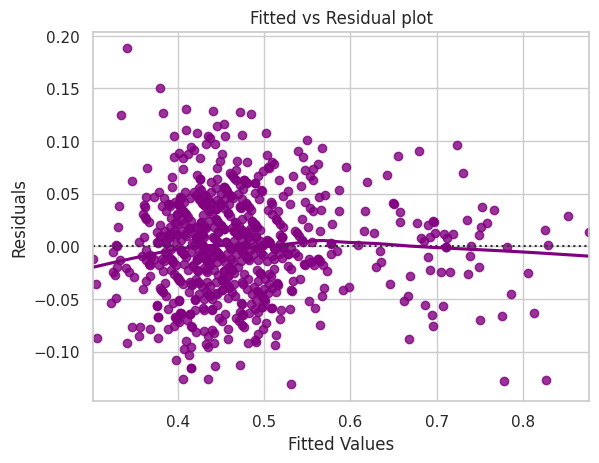

In [ ]:
# let us plot the fitted values vs residuals
sns.set_style("whitegrid")
sns.residplot(
    data=df_pred, x="Fitted Values", y="Residuals", color="purple", lowess=True
)
plt.xlabel("Fitted Values")
plt.ylabel("Residuals")
plt.title("Fitted vs Residual plot")
plt.show()

* The scatter plot shows the distribution of residuals (errors) vs fitted values (predicted values).

* If there exist any pattern in this plot, we consider it as signs of non-linearity in the data and a pattern means that the model doesn't capture non-linear effects.

* **We see no pattern in the plot above. Hence, the assumptions of linearity and independence are satisfied.**

### TEST FOR NORMALITY

**What is the test?**

* Error terms/residuals should be normally distributed.

* If the error terms are not normally distributed, confidence intervals may become too wide or narrow. Once confidence interval becomes unstable, it leads to difficulty in estimating coefficients based on minimization of least squares.

**What does non-normality indicate?**

* It suggests that there are a few unusual data points which must be studied closely to make a better model.

**How to check the Normality?**

* It can be checked via QQ Plot - residuals following normal distribution will make a straight line plot, otherwise not.

* Another test to check for normality is the Shapiro-Wilk test.

**How to Make residuals normal?**

* We can apply transformations like log, exponential, arcsinh, etc as per our data.

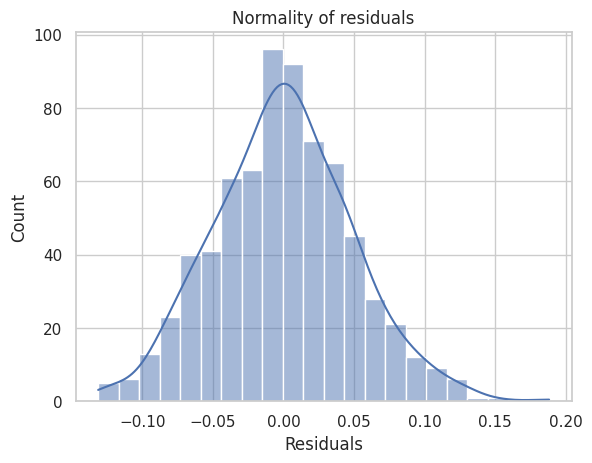

In [ ]:
sns.histplot(df_pred["Residuals"], kde=True)
plt.title("Normality of residuals")
plt.show()

- The residual terms are normally distributed

**The Q-Q plot of residuals can be used to visually check the normality assumption. The normal probability plot of residuals should approximately follow a straight line.**

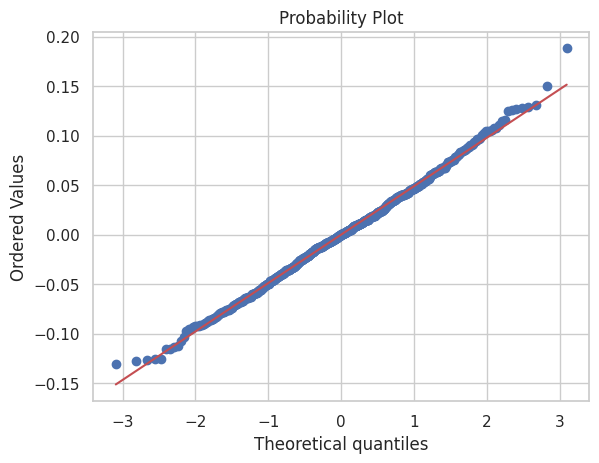

In [ ]:
import pylab
import scipy.stats as stats

stats.probplot(df_pred["Residuals"], dist="norm", plot=pylab)
plt.show()

* Most of the points are lying on the straight line in QQ plot

The **Shapiro-Wilk** test can also be used for checking the normality. The null and alternate hypotheses of the test are as follows:

* Null hypothesis - Data is normally distributed.
* Alternate hypothesis - Data is not normally distributed.

In [ ]:
stats.shapiro(df_pred["Residuals"])

ShapiroResult(statistic=0.9973143339157104, pvalue=0.3104695975780487)

- Since p-value > 0.05, the residuals are normal as per shapiro test.

### TEST FOR HOMOSCEDASTICITY

* **Homoscedacity** - If the variance of the residuals are symmetrically distributed across the regression line , then the data is said to homoscedastic.

* **Heteroscedacity** - If the variance is unequal for the residuals across the regression line, then the data is said to be heteroscedastic. In this case the residuals can form an arrow shape or any other non symmetrical shape.

**Why the test?**

* The presence of non-constant variance in the error terms results in heteroscedasticity. Generally, non-constant variance arises in presence of outliers.

**How to check if model has Heteroscedasticity?**

* Can use the goldfeldquandt test. If we get p-value > 0.05 we can say that the residuals are homoscedastic, otherwise they are heteroscedastic.

**How to deal with Heteroscedasticity?**

* Can be fixed via adding other important features or making transformations.

```
The null and alternate hypotheses of the goldfeldquandt test are as follows:

Null hypothesis : Residuals are homoscedastic
Alternate hypothesis : Residuals have hetroscedasticity
```

In [ ]:
import statsmodels.stats.api as sms
from statsmodels.compat import lzip

In [ ]:
name = ["F statistic", "p-value"]
test = sms.het_goldfeldquandt(df_pred["Residuals"], x_train2)
lzip(name, test)

[('F statistic', 1.1313612904200752), ('p-value', 0.12853551819087372)]

* Since p-value > 0.05 we can say that the residuals are homoscedastic.

## Predictions on test data

Now that we have checked all the assumptions of linear regression and they are satisfied, let's go ahead with prediction

In [ ]:
# predictions on the test set
pred = olsmod_3.predict(x_test2)

df_pred_test = pd.DataFrame({"Actual": y_test, "Predicted": pred})
df_pred_test.sample(10, random_state=1)

,Actual,Predicted
983,0.43,0.434802
194,0.51,0.500314
314,0.48,0.430257
429,0.41,0.492544
267,0.41,0.487034
746,0.68,0.680000
186,0.62,0.595078
964,0.48,0.503909
676,0.42,0.490313
320,0.58,0.560155


- We can observe here that our model has returned pretty good prediction results, and the actual and predicted values are comparable

## Final Model

**All the assumptions of linear regression are now satisfied. Let's check the summary of our final model (olsres_11).**

In [ ]:
x_train_final = x_train2.copy()
x_test_final = x_test2.copy()

In [ ]:
olsmodel_final = sm.OLS(y_train, x_train_final).fit()
print(olsmodel_final.summary())

                            OLS Regression Results                            
Dep. Variable:          views_content   R-squared:                       0.789
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     233.8
Date:                Wed, 03 Jul 2024   Prob (F-statistic):          7.03e-224
Time:                        16:55:28   Log-Likelihood:                 1120.2
No. Observations:                 700   AIC:                            -2216.
Df Residuals:                     688   BIC:                            -2162.
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                             coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------
const                      0

In [ ]:
# checking model performance on train set (seen 70% data)
print("Training Performance\n")
olsmodel_final_train_perf = model_performance_regression(
    olsmodel_final, x_train_final, y_train
)
olsmodel_final_train_perf

Training Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.048841,0.038385,0.788937,0.785251,8.595246


In [ ]:
# checking model performance on test set (seen 30% data)
print("Test Performance\n")
olsmodel_final_test_perf = model_performance_regression(
    olsmodel_final, x_test_final, y_test
)
olsmodel_final_test_perf

Test Performance



,RMSE,MAE,R-squared,Adj. R-squared,MAPE
0,0.051109,0.041299,0.761753,0.751792,9.177097


* The model is able to explain ~79% of the variation in the data

* The train and test RMSE and MAE are low and comparable. So, our model is not suffering from overfitting

* The MAPE on the test set suggests we can predict within 9.17% of the anime ratings

* Hence, we can conclude the model *olsmodel_final* is good for prediction as well as inference purposes

### Let's print the linear regression equation.

In [ ]:
# let's check the model parameters
olsmod_3.params

const                     0.074671
visitors                  0.129096
views_trailer             0.002331
major_sports_event_yes   -0.060555
dayofweek_Monday          0.032066
dayofweek_Saturday        0.057029
dayofweek_Sunday          0.034386
dayofweek_Thursday        0.015449
dayofweek_Wednesday       0.046495
season_Spring             0.022605
season_Summer             0.043391
season_Winter             0.028231
dtype: float64

In [ ]:
# Let us write the equation of linear regression
Equation = "Content Views ="
print(Equation, end=" ")
for i in range(len(x_train2.columns)):
    if i == 0:
        print(olsmod_3.params[i], "+", end=" ")
    elif i != len(x_train2.columns) - 1:
        print(
            olsmod_3.params[i],
            "* (",
            x_train2.columns[i],
            ")",
            "+",
            end="  ",
        )
    else:
        print(olsmod_3.params[i], "* (", x_train2.columns[i], ")")

Content Views = 0.07467052053721057 + 0.12909581825894156 * ( visitors ) +  0.002330816786164018 * ( views_trailer ) +  -0.06055507818137328 * ( major_sports_event_yes ) +  0.03206580679023641 * ( dayofweek_Monday ) +  0.05702859660165121 * ( dayofweek_Saturday ) +  0.03438622992362495 * ( dayofweek_Sunday ) +  0.015449441769973156 * ( dayofweek_Thursday ) +  0.04649480366984811 * ( dayofweek_Wednesday ) +  0.022604915818118014 * ( season_Spring ) +  0.043391002636099754 * ( season_Summer ) +  0.028230557183976934 * ( season_Winter )


### Conclusions and Recommendations


- The model's R-squared value is approximately 0.79, and the adjusted R-squared is 0.786, indicating that the model can explain about 79% of the variance in the data. This is quite satisfactory.

    - This suggests that the model is suitable for both prediction and inference purposes.

- A major sports event will lead to a 0.0604 unit decrease in content viewership, assuming all other variables remain constant.

    - To improve content viewership, it is recommended to avoid releasing content on days when major sports events are happening.

- An increase of one unit in the 'visitors' variable results in a 0.1291 unit increase in content viewership, with all other variables held constant.

    - The client should provide more detailed information to identify the reasons behind increases in viewership.

- An increase of one unit in trailer viewers will result in a 0.0023 unit increase in content viewership, all other variables held constant.

- Releasing content on specific days of the week will increase viewership: Saturday (0.0583 units), Wednesday (0.0478 units), Sunday (0.0357 units), Monday (0.0334 units), Tuesday (0.0242 units), and Thursday (0.0168 units), with all other variables held constant.

    - Therefore, releasing content on Saturdays and Wednesdays will boost viewership, provided no major sports events occur on those days.

- The summer season can result in a 0.0438 unit increase in content viewership, with all other variables held constant.

    - Releasing content during the summer season can enhance viewership.

